In [2]:
import torch
from matplotlib import pyplot as plt

In [3]:
# Gradient
x = torch.ones(2, 2, requires_grad=True)      # requires_grad=True 라는 것은 해당 텐서를 기준으로 모든 연산들을 추적하여 미분값(gradient) 의 모임(배열) 을 계산할 수 있게 한다.
                                              # 즉, x 에 대하여 연쇄법칙(chain rule) 을 이용한 미분이 가능하다는 것이다.
y = x+1
z = 2*y**2
r = z.mean()
print('Result: ',r)

Result:  tensor(8., grad_fn=<MeanBackward0>)


In [4]:
r.backward()
# r 을 기준으로 역전파를 진행하겠다는 의미로 dr/dx 를 계산하는데 연쇄법칙을 이용하여
# dr/dx = dr/dz * dz/dy * dy/dx
# 이때 dr/dz = 1/4, dz/dy = 4 * y_i, dy/dx=1 이므로 dr/dx = 1/4 * 4 * y_i * 1 = x_i + 1 를 얻을 수 있다.
# 모든 x_i = 1 이므로 x.grad 를 통해 나온 값은 모두 2 이다.
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


In [5]:
# Auto grad - linear regression
x = torch.FloatTensor(range(5)).unsqueeze(1)      # unsqueeze(1) 을 이용해 dimension=1 을 늘려주었다. 따라서 shape 은 5 * 1
y = 2*x + torch.rand(5, 1)                        # 5 * 1
num_features = x.shape[1]                         # 변수의 개수를 저장한다. x 의 크기는 (5, 1) 이므로 인스턴스의 개수가 5 이고, 변수의 개수가 1 인 데이터이므로 1 을 저장

In [6]:
w = torch.randn(num_features, 1, requires_grad=True)  # 선형식은 y=wx+b 로 표현된다. 따라서 행렬 w 는 행렬 (5, 1) 에 곱할 수 있어야 하고, 출력값은 1 이어야하므로 (num_features, 1) 로 지정한다.
b = torch.randn(1, requires_grad=True)                # bias(편향) 는 모든 인스턴스에 동일한 값을 더해줘야하므로 크기가 1 인 텐서로 정의한다.
# 데이터 텐서와 달리 역전파를 통해 최적화를 해야하므로 requires_grad=True 로 설정한다.

In [7]:
# gradient Descent
learning_rate=1e-3
# SGD(확률적 경사하강법)
optimizer = torch.optim.SGD([w, b], lr=learning_rate)   # 적절한 학습률(learning rate) 를 설정하여 자동으로 가중치(weight)와 편향(bias)를 업데이트 한다.

In [8]:
loss_stack = []                                # 매 epoch 마다 손실 함수값을 저장기 위해 빈 리스트를 생성
for epoch in range(1001):

  optimizer.zero_grad()                        # 최적화에 의해 누적된 값을 매 에폭마다 초기화
  y_hat = torch.matmul(x, w) + b               # y=wx+b
  loss = torch.mean((y_hat-y)**2)              # 손실함수 Mean Square Error
  loss.backward()                              # 역전파의 기준을 loss function 으로 설정
  optimizer.step()                             # 최적화하여 값을 업데이트
  loss_stack.append(loss.item())               # loss_stack 리스트에 손실 함수값을 저장

  if epoch % 100 == 0:
    print('Epoch {:6d}/1000 Cost: {:6f}'.format(
        epoch, loss.item()
    ))

Epoch      0/1000 Cost: 46.033813
Epoch    100/1000 Cost: 3.202723
Epoch    200/1000 Cost: 0.319194
Epoch    300/1000 Cost: 0.123879
Epoch    400/1000 Cost: 0.109597
Epoch    500/1000 Cost: 0.107626
Epoch    600/1000 Cost: 0.106596
Epoch    700/1000 Cost: 0.105731
Epoch    800/1000 Cost: 0.104966
Epoch    900/1000 Cost: 0.104288
Epoch   1000/1000 Cost: 0.103686


In [9]:
# 예측값 산출(최적화 사용x)
with torch.no_grad():
  y_hat = torch.matmul(x, w) + b

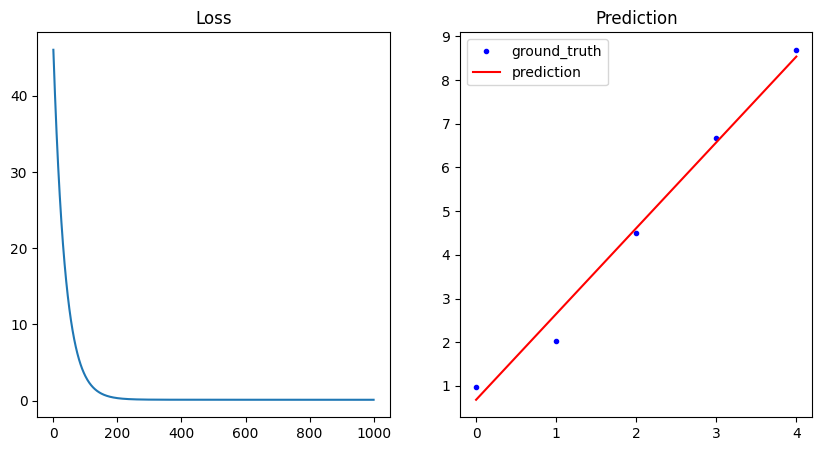

In [13]:
# 그래프 출력
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground_truth', 'prediction'])
plt.title("Prediction")
plt.show()